In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [30]:
X = pd.read_csv('independent_variable.csv')
X.head()

,Sulfur_content_of_raw_material,RON_of_raw_material,Saturated_hydrocarbon,olefin,Bromine,density,Substitute_coke,Substitute_S,Regenerated_coke,Regenerated_S,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.23,24.40,61.49,726.09,2.32,7.30,1.84,5.98,...,2.0454,6368.7470,233.3108,83086802.0,832503.795,2216.4094,39063124.5,1840.1447,39608757.0,0.3533
1,169.0,90.5,52.30,26.40,61.88,731.30,2.37,7.34,0.55,4.38,...,2.0260,6360.6453,242.3692,82318954.0,803462.665,2370.5874,38810581.5,1641.7326,39389299.0,0.3545
2,177.0,90.7,52.30,26.31,61.72,729.61,2.43,7.27,1.89,5.82,...,1.9647,6504.9649,233.0769,82012004.0,791925.055,2326.4654,38693812.0,1600.6758,39312616.5,0.3502
3,159.0,90.4,52.30,26.10,61.33,725.40,3.08,7.35,0.98,4.67,...,2.0390,6506.8250,238.3499,81231373.5,762863.810,2495.2236,38410862.5,1563.7122,39120204.5,0.3539
4,173.0,89.6,52.24,26.67,61.33,725.43,2.45,6.58,0.83,4.52,...,1.9869,6560.2423,236.5762,80915707.5,751362.300,2807.7891,38283000.0,1554.3574,39045953.5,0.3581


In [31]:
y = pd.read_csv('dependent_variable.csv').values.reshape(-1)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
param = {'boosting_type':'gbdt',
         'objective' : 'regression', #任务类型
         'metric' : 'mse', #评估指标
         'learning_rate' : 0.01, #学习率
         'max_depth' : 20, #树的最大深度
         'feature_fraction':0.8, #设置在每次迭代中使用特征的比例
         'bagging_fraction': 0.8, #样本采样比例
         'bagging_freq': 8, #bagging的次数
         'lambda_l1': 0.3, #L1正则
          'lambda_l2': 0, #L2正则
        }
x = X_train[['S-ZORB.PC_1001A.PV',
 'S-ZORB.FC_1201.PV',
 'S-ZORB.PT_1604.DACA',
 'S-ZORB.FT_1001.PV',
 'S-ZORB.FT_3702.DACA',
 'S-ZORB.LT_1002.DACA',
 'S-ZORB.TE_1501.DACA',
 'S-ZORB.TE_5008.DACA',
 'S-ZORB.TE_1105.PV',
 'S-ZORB.FT_1504.DACA.PV',
 'S-ZORB.PDT_2606.DACA',
 'S-ZORB.FC_1203.PV',
 'S-ZORB.TE_5202.PV',
 'S-ZORB.FC_5001.DACA',
 'S-ZORB.FT_1003.PV',
 'S-ZORB.FT_9301.PV',
 'RON_of_raw_material']]
x1 = X_valid[['S-ZORB.PC_1001A.PV',
 'S-ZORB.FC_1201.PV',
 'S-ZORB.PT_1604.DACA',
 'S-ZORB.FT_1001.PV',
 'S-ZORB.FT_3702.DACA',
 'S-ZORB.LT_1002.DACA',
 'S-ZORB.TE_1501.DACA',
 'S-ZORB.TE_5008.DACA',
 'S-ZORB.TE_1105.PV',
 'S-ZORB.FT_1504.DACA.PV',
 'S-ZORB.PDT_2606.DACA',
 'S-ZORB.FC_1203.PV',
 'S-ZORB.TE_5202.PV',
 'S-ZORB.FC_5001.DACA',
 'S-ZORB.FT_1003.PV',
 'S-ZORB.FT_9301.PV',
 'RON_of_raw_material']]
trn_data = lgb.Dataset(x, label=y_train)
val_data = lgb.Dataset(x1, label=y_valid)
model_RON = lgb.train(param,trn_data,valid_sets=[trn_data,val_data],\
                  num_boost_round = 100000,early_stopping_rounds=1000,verbose_eval=25)

Training until validation scores don't improve for 1000 rounds
[25]	training's l2: 0.66056	valid_1's l2: 0.566322
[50]	training's l2: 0.4606	valid_1's l2: 0.401451
[75]	training's l2: 0.32446	valid_1's l2: 0.286359
[100]	training's l2: 0.241442	valid_1's l2: 0.217818
[125]	training's l2: 0.172217	valid_1's l2: 0.160867
[150]	training's l2: 0.13036	valid_1's l2: 0.126008
[175]	training's l2: 0.104914	valid_1's l2: 0.10461
[200]	training's l2: 0.0864328	valid_1's l2: 0.0896023
[225]	training's l2: 0.0741977	valid_1's l2: 0.0806827
[250]	training's l2: 0.0650714	valid_1's l2: 0.0740637
[275]	training's l2: 0.0587763	valid_1's l2: 0.0696288
[300]	training's l2: 0.0542152	valid_1's l2: 0.0681242
[325]	training's l2: 0.0506377	valid_1's l2: 0.0658301
[350]	training's l2: 0.0477002	valid_1's l2: 0.064252
[375]	training's l2: 0.0449524	valid_1's l2: 0.0629239
[400]	training's l2: 0.042517	valid_1's l2: 0.0619457
[425]	training's l2: 0.0403522	valid_1's l2: 0.0611113
[450]	training's l2: 0.0384

In [34]:
data = pd.read_csv('data_final.csv')
data.head()
y_Sulfur = data.产品硫含量.values

In [35]:
y_train_Sulfur = data.产品硫含量[X_train.index].values

In [36]:
y_valid_Sulfur = data.产品硫含量[X_valid.index].values

In [37]:
trn_data_Sulfur = lgb.Dataset(x, label=y_train_Sulfur)
val_data_Sulfur = lgb.Dataset(x1, label=y_valid_Sulfur)
model_Sulfur = lgb.train(param,trn_data_Sulfur,valid_sets=[trn_data_Sulfur,val_data_Sulfur],\
                  num_boost_round = 100000,early_stopping_rounds=1000,verbose_eval=25)

Training until validation scores don't improve for 1000 rounds
[25]	training's l2: 2.29102	valid_1's l2: 1.57948
[50]	training's l2: 2.07229	valid_1's l2: 1.5881
[75]	training's l2: 1.90466	valid_1's l2: 1.61689
[100]	training's l2: 1.78793	valid_1's l2: 1.64526
[125]	training's l2: 1.67552	valid_1's l2: 1.68792
[150]	training's l2: 1.58401	valid_1's l2: 1.72029
[175]	training's l2: 1.4927	valid_1's l2: 1.78023
[200]	training's l2: 1.41174	valid_1's l2: 1.78625
[225]	training's l2: 1.34957	valid_1's l2: 1.83582
[250]	training's l2: 1.28637	valid_1's l2: 1.8564
[275]	training's l2: 1.22649	valid_1's l2: 1.8737
[300]	training's l2: 1.17186	valid_1's l2: 1.86871
[325]	training's l2: 1.12344	valid_1's l2: 1.89229
[350]	training's l2: 1.07858	valid_1's l2: 1.91374
[375]	training's l2: 1.04265	valid_1's l2: 1.9429
[400]	training's l2: 1.00295	valid_1's l2: 1.96292
[425]	training's l2: 0.959	valid_1's l2: 1.96578
[450]	training's l2: 0.92506	valid_1's l2: 1.93527
[475]	training's l2: 0.889228

In [38]:
np.random.seed(1000)

In [39]:
bound = [(-125,0.5),(75,150),(0.1,0.3),(40,145),(0,60),(-5,2),(20,30),(40,100),(40,80),(-14000,3500),\
         (-0.5,20),(5,15),(30,45),(500,3800),(0,75),(0,3500)]

In [136]:
dic = ['S-ZORB.PC_1001A.PV',
 'S-ZORB.FC_1201.PV',
 'S-ZORB.PT_1604.DACA',
 'S-ZORB.FT_1001.PV',
 'S-ZORB.FT_3702.DACA',
 'S-ZORB.LT_1002.DACA',
 'S-ZORB.TE_1501.DACA',
 'S-ZORB.TE_5008.DACA',
 'S-ZORB.TE_1105.PV',
 'S-ZORB.FT_1504.DACA.PV',
 'S-ZORB.PDT_2606.DACA',
 'S-ZORB.FC_1203.PV',
 'S-ZORB.TE_5202.PV',
 'S-ZORB.FC_5001.DACA',
 'S-ZORB.FT_1003.PV',
 'S-ZORB.FT_9301.PV',
 'RON_of_raw_material']

In [108]:
ini_pop = pd.DataFrame(columns=dic)

In [109]:
df = X[X['RON_of_raw_material']==90.7][['S-ZORB.PC_1001A.PV',
 'S-ZORB.FC_1201.PV',
 'S-ZORB.PT_1604.DACA',
 'S-ZORB.FT_1001.PV',
 'S-ZORB.FT_3702.DACA',
 'S-ZORB.LT_1002.DACA',
 'S-ZORB.TE_1501.DACA',
 'S-ZORB.TE_5008.DACA',
 'RON_of_raw_material',
 'S-ZORB.TE_1105.PV',
 'S-ZORB.FT_1504.DACA.PV',
 'S-ZORB.PDT_2606.DACA',
 'S-ZORB.FC_1203.PV',
 'S-ZORB.TE_5202.PV',
 'S-ZORB.FC_5001.DACA',
 'S-ZORB.FT_1003.PV',
 'S-ZORB.FT_9301.PV']]

ini_pop = ini_pop.append(df)
ini_pop

,S-ZORB.PC_1001A.PV,S-ZORB.FC_1201.PV,S-ZORB.PT_1604.DACA,S-ZORB.FT_1001.PV,S-ZORB.FT_3702.DACA,S-ZORB.LT_1002.DACA,S-ZORB.TE_1501.DACA,S-ZORB.TE_5008.DACA,S-ZORB.TE_1105.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.PDT_2606.DACA,S-ZORB.FC_1203.PV,S-ZORB.TE_5202.PV,S-ZORB.FC_5001.DACA,S-ZORB.FT_1003.PV,S-ZORB.FT_9301.PV,RON_of_raw_material
2,0.3502,129.0354,0.2000,113.0896,41.5372,-4.9690,21.2022,65.3550,54.6989,1600.6758,10.9701,11.5726,32.8114,2117.8925,44.4330,1025.8748,90.7
217,-49.4848,113.6415,0.1404,129.5721,30.9934,-4.9662,22.8809,52.1678,66.7363,2261.7765,8.4511,11.7275,37.5446,946.3719,54.2460,248.0333,90.7
218,-49.9980,112.8012,0.1275,128.6126,0.0000,-4.9673,22.8039,50.7857,66.1458,2157.7519,9.1978,12.1065,31.9411,942.1702,53.4162,229.9617,90.7
245,-73.8609,118.1742,0.1732,128.4482,0.0000,-4.9655,22.5746,59.0285,65.5416,2809.8877,5.5660,10.8697,34.0586,1653.9840,44.5687,1958.8598,90.7
304,-108.7573,113.6691,0.1312,126.5335,41.3235,-4.9679,21.5159,58.8264,70.3157,2470.0332,1.3340,10.7273,34.6008,1506.3530,56.1530,904.8354,90.7


In [110]:
model_RON.predict(ini_pop)

array([89.35472023, 89.47659675, 89.48666613, 89.51785248, 89.30828386])

In [111]:
nums = ini_pop.iloc[:,:-1].values

In [112]:
ron = ini_pop['RON_of_raw_material'].values[:,np.newaxis]

In [46]:
def fun(position,ron):
    return model_RON.predict(np.concatenate([position,ron],axis=1))

In [113]:
fun(nums,ron)

array([89.35472023, 89.47659675, 89.48666613, 89.51785248, 89.30828386])

In [114]:
#初始化化速度
def pso(nums,ron,iteration,bound):
    m,n = nums.shape
    v = np.random.randn(m,n)
    fitness = fun(nums,ron)
    c1 = c2 = 2
    p = nums
    pg = nums[np.argmax(fitness)]
    individual_best_fitness = fitness
    global_best_fitness = np.max(fitness)

    for step in range(iteration):
        r1 = np.random.rand(m, n)
        r2 = np.random.rand(m, n)
        # 更新速度和权重
        v = 0.6*v+c1*r1*(p-nums)+c2*r2*(pg-nums)
        nums = v + nums
        for i in range(m):
            for j in range(n):
                if nums[i,j] < bound[j][0]:
                    nums[i,j] = bound[j][0]
                elif nums[i,j] > bound[j][1]:
                    nums[i,j] = bound[j][1]
        fitness = fun(nums,ron)
        # 需要更新的个体
        update_id = np.less(individual_best_fitness, fitness)
        p[update_id] = nums[update_id]
        individual_best_fitness[update_id] = fitness[update_id]
        # 新一代出现了更小的fitness，所以更新全局最优fitness和位置
        if np.max(fitness) > global_best_fitness:
            pg = nums[np.argmax(fitness)]
            global_best_fitness = np.max(fitness)
    return nums

In [115]:
position = pso(nums,ron,50000,bound)

In [116]:
model_Sulfur.predict(np.concatenate([position,ron],axis=1))

array([4.20353051, 4.20353051, 4.20353051, 4.20353051, 4.20353051])

In [117]:
fun(position,ron)

array([89.84036901, 89.83802355, 89.83969235, 89.84089298, 89.8122918 ])

In [118]:
fun(nums,ron)

array([89.84089298, 89.84089298, 89.84089298, 89.84089298, 89.84089298])

In [125]:
raw_RON = X['RON_of_raw_material']
raw_RON[ini_pop.index]-(raw_RON[ini_pop.index]-y[ini_pop.index])*0.7

2      89.734
217    89.846
218    89.916
245    89.930
304    89.874
Name: RON_of_raw_material, dtype: float64

In [129]:
tar = raw_RON[ini_pop.index]-(raw_RON[ini_pop.index]-y[ini_pop.index])*0.7

In [131]:
np.array(tar[np.greater(fun(position,ron),tar)].index)

array([2], dtype=int64)

In [133]:
RONS = raw_RON.unique()

In [139]:
dics = {}
for RON in RONS:
    dic = ['S-ZORB.PC_1001A.PV',
     'S-ZORB.FC_1201.PV',
     'S-ZORB.PT_1604.DACA',
     'S-ZORB.FT_1001.PV',
     'S-ZORB.FT_3702.DACA',
     'S-ZORB.LT_1002.DACA',
     'S-ZORB.TE_1501.DACA',
     'S-ZORB.TE_5008.DACA',
     'S-ZORB.TE_1105.PV',
     'S-ZORB.FT_1504.DACA.PV',
     'S-ZORB.PDT_2606.DACA',
     'S-ZORB.FC_1203.PV',
     'S-ZORB.TE_5202.PV',
     'S-ZORB.FC_5001.DACA',
     'S-ZORB.FT_1003.PV',
     'S-ZORB.FT_9301.PV',
     'RON_of_raw_material']
    ini_pop = pd.DataFrame(columns=dic)
    df = X[X['RON_of_raw_material']==RON][dic]
    ini_pop = ini_pop.append(df)
    nums = ini_pop.iloc[:,:-1].values
    ron = ini_pop['RON_of_raw_material'].values[:,np.newaxis]
    position = pso(nums,ron,20000,bound)
    target = raw_RON[ini_pop.index]-(raw_RON[ini_pop.index]-y[ini_pop.index])*0.7
    optim = fun(position,ron)
    dics[RON] = np.array(target[np.greater(optim,target)].index)

In [140]:
dics

{90.6: array([  0,  70, 107, 120, 192, 221], dtype=int64),
 90.5: array([  7,  88, 109, 112, 222, 226, 227, 231, 239, 248, 256], dtype=int64),
 90.7: array([2], dtype=int64),
 90.4: array([  3,   6, 156, 224, 225, 228, 232, 247, 251, 301, 314], dtype=int64),
 89.6: array([  4,  22,  42,  46,  49,  50,  55, 127, 128, 205, 267, 281],
       dtype=int64),
 91.0: array([  5,  99, 105, 114, 115, 214, 220], dtype=int64),
 90.2: array([  9,  10,  11,  48,  52, 124, 160, 176, 235, 236, 249, 257],
       dtype=int64),
 89.2: array([ 12,  25,  29,  40,  59, 133, 134, 157, 206, 278, 320, 321],
       dtype=int64),
 86.8: array([13], dtype=int64),
 87.8: array([ 14, 150], dtype=int64),
 88.4: array([15, 74], dtype=int64),
 87.2: array([16, 85], dtype=int64),
 88.0: array([17, 68], dtype=int64),
 88.2: array([148], dtype=int64),
 88.8: array([ 19,  63, 163, 186], dtype=int64),
 88.1: array([], dtype=int64),
 89.0: array([ 23,  27,  61,  66, 145, 168, 283, 288, 289], dtype=int64),
 89.3: array([ 24,

In [149]:
ini_pop = pd.DataFrame(columns=dic)
df = X[X['RON_of_raw_material']==89.4][dic]
ini_pop = ini_pop.append(df)
nums = ini_pop.iloc[:,:-1].values
ron = ini_pop['RON_of_raw_material'].values[:,np.newaxis]
position = pso(nums,ron,20000,bound)
target = raw_RON[ini_pop.index]-(raw_RON[ini_pop.index]-y[ini_pop.index])*0.7
optim = fun(position,ron)

array([  7,  88, 109, 112, 222, 226, 227, 231, 239, 248, 256], dtype=int64)

In [150]:
target

36     88.483
56     88.630
58     88.175
130    88.280
132    88.483
158    88.546
159    88.686
173    88.553
182    88.672
198    88.623
207    88.413
208    88.693
266    88.532
273    88.483
282    88.672
308    88.644
322    88.455
323    88.504
Name: RON_of_raw_material, dtype: float64

In [151]:
optim

array([88.73310419, 88.73748269, 88.73413579, 88.73748269, 88.73748269,
       88.73748269, 88.73054727, 88.72984427, 88.73748269, 88.73536526,
       88.73467308, 88.73536526, 88.73748269, 88.73584699, 88.69982873,
       88.71278315, 88.73413579, 88.72831327])

In [152]:
position[4]

array([-1.25000000e+02,  1.16766671e+02,  3.00000000e-01,  1.22146665e+02,
        1.57969502e+01,  1.60085287e+00,  2.24081879e+01,  6.25259391e+01,
        7.88350806e+01,  2.52495180e+03,  1.84564414e+01,  9.87971337e+00,
        3.43524904e+01,  1.66050049e+03,  7.02680068e+01,  1.64437348e+03])

In [153]:
model_Sulfur.predict(np.concatenate([position,ron],axis=1))

array([4.65066624, 4.67356495, 4.56804383, 4.65066624, 4.65066624,
       4.65066624, 4.65066624, 4.65066624, 4.65066624, 4.67356495,
       4.65066624, 4.65066624, 4.65066624, 4.65066624, 4.65690611,
       4.65066624, 4.65066624, 4.67356495])

In [147]:
position[1]

array([-1.18082450e+01,  1.16889872e+02,  3.00000000e-01,  1.16906379e+02,
        1.63293312e+01, -4.96570417e+00,  3.00000000e+01,  6.24654077e+01,
        5.66125067e+01,  2.57830875e+03,  1.49779784e+01,  1.50000000e+01,
        3.00000000e+01,  2.29996391e+03,  4.82311215e+01,  1.64351589e+03])

In [148]:
position[4]

array([-1.18509585e+01,  1.16938307e+02,  3.00000000e-01,  1.16687665e+02,
        1.63486502e+01, -4.28958926e+00,  3.00000000e+01,  6.24708905e+01,
        5.66220175e+01,  2.55953456e+03,  1.56062540e+01,  1.50000000e+01,
        3.00000000e+01,  2.29976327e+03,  4.82066537e+01,  1.64333015e+03])

In [154]:
model_RON.predict(X[dic])

array([89.07364903, 89.15913814, 89.35472023, 89.11444017, 88.37056832,
       89.80454013, 89.22442446, 89.24893839, 89.188042  , 89.23138427,
       88.83167675, 88.78583675, 87.74337721, 86.09402195, 86.17413133,
       86.59630918, 86.30034784, 86.33104154, 86.59253127, 87.63551413,
       86.5547904 , 86.68797798, 88.18413468, 87.57158189, 87.85876115,
       87.93286474, 87.2969024 , 87.72438737, 88.26865516, 87.99771317,
       87.57447995, 87.17966294, 87.06074548, 86.64097828, 87.47978662,
       86.45881907, 87.99889164, 87.87136041, 88.27288014, 88.29165008,
       87.81946782, 88.55383381, 88.27700534, 88.21462732, 88.37494611,
       88.28166911, 88.32090788, 88.6924755 , 89.03162022, 88.47172991,
       88.46260394, 88.8660467 , 88.9051756 , 88.92061738, 88.6101844 ,
       88.43531843, 88.17570281, 87.35410701, 87.99944187, 87.87538108,
       88.30596693, 87.41969497, 87.59513129, 87.69758616, 87.03332591,
       87.38846972, 87.71798795, 87.17102171, 86.50344267, 86.99

In [155]:
model_Sulfur.predict(X[dic])

array([3.8974242 , 3.8993553 , 3.89002764, 3.84265673, 3.89719185,
       3.90987308, 3.90987308, 4.02082441, 3.90545799, 3.96746199,
       3.95614037, 3.9514181 , 3.98741302, 3.95995257, 3.92970548,
       3.92801644, 3.86134789, 3.98469408, 4.05141113, 4.01489555,
       3.99173992, 3.95327579, 3.86618668, 3.85168179, 3.91461704,
       3.94052423, 3.92443712, 3.86332009, 3.91312776, 3.94045531,
       4.12077047, 3.96802507, 3.93513697, 3.97704191, 4.0168115 ,
       3.92737376, 3.96380281, 3.91166275, 4.00164792, 4.00393487,
       3.91048172, 4.1141006 , 4.09256479, 4.10014201, 4.15694694,
       3.98143718, 4.15331414, 4.26890173, 4.24522813, 4.24678232,
       4.20017395, 4.08843517, 4.24382352, 4.23193266, 4.15814962,
       4.15995279, 4.14516149, 4.10812244, 4.00959795, 4.10281763,
       3.91213098, 3.93231691, 3.99472848, 3.90515581, 3.83061735,
       3.8764985 , 3.83974368, 3.86061139, 3.84456072, 3.89900779,
       3.84526325, 3.86114494, 3.94810425, 3.94771891, 3.95196

In [156]:
import seaborn as sns

## 第五步可视化

In [160]:
x_133 = X.loc[132,dic]
x_133

S-ZORB.PC_1001A.PV           0.3506
S-ZORB.FC_1201.PV          114.1334
S-ZORB.PT_1604.DACA          0.1756
S-ZORB.FT_1001.PV          122.7257
S-ZORB.FT_3702.DACA          0.0000
S-ZORB.LT_1002.DACA         -4.9701
S-ZORB.TE_1501.DACA         22.4069
S-ZORB.TE_5008.DACA         62.3974
S-ZORB.TE_1105.PV           54.7885
S-ZORB.FT_1504.DACA.PV    2695.4880
S-ZORB.PDT_2606.DACA        10.1016
S-ZORB.FC_1203.PV           11.2819
S-ZORB.TE_5202.PV           34.4525
S-ZORB.FC_5001.DACA       2291.2150
S-ZORB.FT_1003.PV           50.5188
S-ZORB.FT_9301.PV         2310.4410
RON_of_raw_material         89.4000
Name: 132, dtype: float64

In [165]:
S_ZORB_PC_1001A_PV = np.linspace(-125+0.3506,0.3506,250)

In [178]:
sulfurs = []
rons_133 = []
for i in S_ZORB_PC_1001A_PV:
    x_133['S-ZORB.PC_1001A.PV'] = i
    sulfurs.append(model_Sulfur.predict(x_133))
    rons_133.append(model_RON.predict(x_133))

D:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


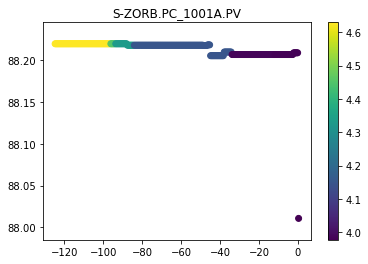

In [181]:
plt.scatter(S_ZORB_PC_1001A_PV,rons_133,c=sulfurs)
plt.colorbar()
plt.title('S-ZORB.PC_1001A.PV')
plt.show()

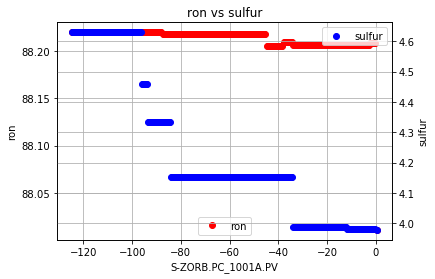

In [182]:
fig,ax1 = plt.subplots()
plt.plot(S_ZORB_PC_1001A_PV,rons_133,'ro',label='ron')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight')
plt.xlabel('S-ZORB.PC_1001A.PV')
plt.ylabel('ron')
plt.title('ron vs sulfur')
ax2 = ax1.twinx()
plt.plot(S_ZORB_PC_1001A_PV,sulfurs,'bo',label='sulfur')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('sulfur')
plt.show()

In [183]:
S_ZORB_TE_1105_PV = np.linspace(54.7885,78.7885,24)
S_ZORB_TE_1105_PV

array([54.7885    , 55.83197826, 56.87545652, 57.91893478, 58.96241304,
       60.0058913 , 61.04936957, 62.09284783, 63.13632609, 64.17980435,
       65.22328261, 66.26676087, 67.31023913, 68.35371739, 69.39719565,
       70.44067391, 71.48415217, 72.52763043, 73.5711087 , 74.61458696,
       75.65806522, 76.70154348, 77.74502174, 78.7885    ])

In [184]:
sulfurs = []
rons_133 = []
for i in S_ZORB_TE_1105_PV:
    x_133['S-ZORB.TE_1105.PV'] = i
    sulfurs.append(model_Sulfur.predict(x_133))
    rons_133.append(model_RON.predict(x_133))

D:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


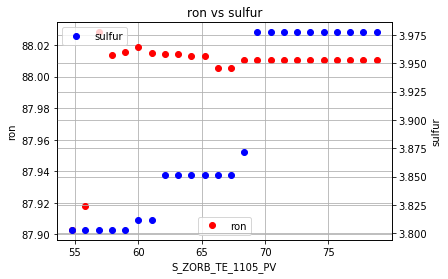

In [185]:
fig,ax1 = plt.subplots()
plt.plot(S_ZORB_TE_1105_PV,rons_133,'ro',label='ron')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight')
plt.xlabel('S_ZORB_TE_1105_PV')
plt.ylabel('ron')
plt.title('ron vs sulfur')
ax2 = ax1.twinx()
plt.plot(S_ZORB_TE_1105_PV,sulfurs,'bo',label='sulfur')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('sulfur')
plt.show()

In [186]:
S_ZORB_FC_5001_DACA = np.linspace(1661.2150,2291.2150,630)
sulfurs = []
rons_133 = []
for i in S_ZORB_FC_5001_DACA:
    x_133['S-ZORB.FC_5001.DACA'] = i
    sulfurs.append(model_Sulfur.predict(x_133))
    rons_133.append(model_RON.predict(x_133))

D:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


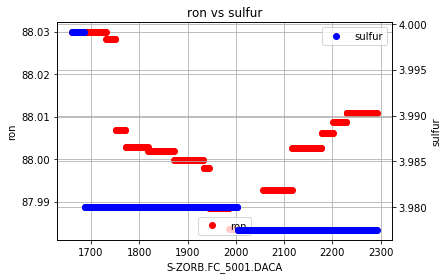

In [188]:
fig,ax1 = plt.subplots()
plt.plot(S_ZORB_FC_5001_DACA,rons_133,'ro',label='ron')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight')
plt.xlabel('S-ZORB.FC_5001.DACA')
plt.ylabel('ron')
plt.title('ron vs sulfur')
ax2 = ax1.twinx()
plt.plot(S_ZORB_FC_5001_DACA,sulfurs,'bo',label='sulfur')
plt.grid(True)
plt.legend(loc=0)
plt.ylabel('sulfur')
plt.show()

In [199]:
S_ZORB_FC_5001_DACA = np.linspace(1661.2150,2291.2150,630)
S_ZORB_PC_1001A_PV = np.linspace(-125+0.3506,0.3506,250)

In [195]:
x_133 = X.loc[132,dic]
s = np.zeros((630,250))
r = np.zeros((630,250))
for i in range(630):
    for j in range(250):
        x_133['S-ZORB.PC_1001A.PV'] = S_ZORB_FC_5001_DACA[i]
        x_133['S-ZORB.FC_5001.DACA'] = S_ZORB_PC_1001A_PV[j]
        s[i,j] = model_Sulfur.predict(x_133)
        r[i,j] = model_RON.predict(x_133)

D:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:546: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


In [196]:
s.shape

(630, 250)

In [200]:
S_ZORB_PC_1001A_PV,S_ZORB_FC_5001_DACA = np.meshgrid(S_ZORB_PC_1001A_PV,S_ZORB_FC_5001_DACA)

In [201]:
S_ZORB_FC_5001_DACA.shape

(630, 250)

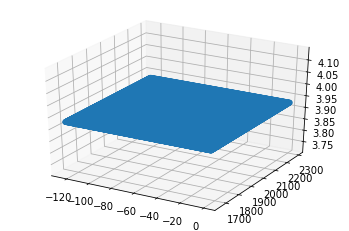

In [202]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(S_ZORB_PC_1001A_PV,S_ZORB_FC_5001_DACA,s, cmap='Blues')
plt.show()

In [3]:
dics = {90.6: [  0,  70, 107, 120, 192, 221],
 90.5: [  7,  88, 109, 112, 222, 226, 227, 231, 239, 248, 256],
 90.7: [2],
 90.4: [  3,   6, 156, 224, 225, 228, 232, 247, 251, 301, 314],
 89.6: [  4,  22,  42,  46,  49,  50,  55, 127, 128, 205, 267, 281],
 91.0: [  5,  99, 105, 114, 115, 214, 220],
 90.2: [  9,  10,  11,  48,  52, 124, 160, 176, 235, 236, 249, 257],
 89.2: [ 12,  25,  29,  40,  59, 133, 134, 157, 206, 278, 320, 321],
 86.8: [13],
 87.8: [ 14, 150],
 88.4: [15, 74],
 87.2: [16, 85],
 88.0: [17, 68],
 88.2: [148],
 88.8: [ 19,  63, 163, 186],
 89.0: [ 23,  27,  61,  66, 145, 168, 283, 288, 289],
 89.3: [ 24,  72,  82, 137, 164, 196, 268, 284, 285, 286],
 88.7: [ 26,  34,  57,  65,  69,  75,  81, 142, 144, 147, 287],
 89.7: [ 28,  39,  44,  60, 129, 165, 181, 201, 202, 203, 204, 230, 263,265, 270, 272, 292, 296, 316, 317],
 89.1: [ 30,  37,  62,  79, 131, 136, 154, 170, 290],
 88.5: [ 31,  67, 139],
 87.5: [ 35, 152, 189, 190],
 89.4: [ 36,  56,  58, 130, 132, 158, 159, 173, 182, 198, 207, 266, 273,282, 308, 322, 323],
 89.5: [ 38,  43,  45, 167, 277, 315, 319],
 89.8: [ 41,  54, 155, 172, 177, 179, 253, 298, 300, 310, 318],
 90.0: [ 47,  87, 180, 199, 234, 274, 276, 294],
 90.1: [ 51,  53,  76,  77,  90, 123, 125, 126, 175, 185, 223, 240, 250,259, 306, 309, 311],
 90.8: [ 71, 122, 215, 216],
 89.9: [ 78, 197, 200, 242, 252, 260, 275, 279, 280, 297, 313, 324],
 87.6: [ 83, 140],
 86.9: [84],
 91.2: [106],
 90.9: [111],
 90.3: [121, 195, 229, 233, 237, 255, 258, 261, 262, 299, 302, 312],
 88.6: [135, 143, 153],
 85.3: [141],
 87.3: [188]}

In [4]:
for _,v in dics.items():
    for i in range(len(v)):
        v[i] += 1

In [6]:
ta = pd.Series(dics)

In [8]:
ta.to_excel('my.xlsx')

In [9]:
data=pd.read_csv('data_final.csv')
data.head()

,id,time,原料硫含量,原料辛烷值,饱和烃,烯烃,溴值,密度,产品硫含量,产品辛烷值,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,1,2020/5/26 8:00:00,188.0,90.6,53.23,24.40,61.49,726.09,3.2,89.22,...,2.0454,6368.7470,233.3108,83086802.0,832503.795,2216.4094,39063124.5,1840.1447,39608757.0,0.3533
1,2,2020/5/21 8:00:00,169.0,90.5,52.30,26.40,61.88,731.30,3.2,89.32,...,2.0260,6360.6453,242.3692,82318954.0,803462.665,2370.5874,38810581.5,1641.7326,39389299.0,0.3545
2,3,2020/5/19 8:00:00,177.0,90.7,52.30,26.31,61.72,729.61,3.2,89.32,...,1.9647,6504.9649,233.0769,82012004.0,791925.055,2326.4654,38693812.0,1600.6758,39312616.5,0.3502
3,4,2020/5/14 8:00:00,159.0,90.4,52.30,26.10,61.33,725.40,3.2,89.02,...,2.0390,6506.8250,238.3499,81231373.5,762863.810,2495.2236,38410862.5,1563.7122,39120204.5,0.3539
4,5,2020/5/12 8:00:00,173.0,89.6,52.24,26.67,61.33,725.43,3.2,88.32,...,1.9869,6560.2423,236.5762,80915707.5,751362.300,2807.7891,38283000.0,1554.3574,39045953.5,0.3581


In [10]:
data.to_excel('data_final.xlsx')